# tf.data API 이용하여 입력 파이프라인 구축

In [1]:
#import necessary libraries.
import tensorflow as tf
import numpy as np
layer = tf.keras.layers

print('check tensorflow version : ', tf.__version__)

check tensorflow version :  2.4.1


# tf.data API

tf.data API는 데이터셋을 모델에 연결해주기 위한 복합적인 입력 파이프라인을 구축할 수 있게 도와줍니다.

다수의 분산된 파일로부터 통합된 데이터를 만들어야 하는 경우나, 데이터 전처리, 미니배치, 랜덤셔플링 등의 데이터 파이프라인을 위한 복잡한 구조를 높은 추상성으로 간단하게 제어할 수 있는 인터페이스를 제공합니다.

https://www.tensorflow.org/guide/data

### 1. from_tensor_slices : python으로부터 데이터 받기

In [2]:
data = np.array(list(range(100)), np.float32) #파이썬 데이터 0,1,2,3,4,...99,100
print(data[:10])

your_first_dataset = tf.data.Dataset.from_tensor_slices(data) #텐서플로우 데이터셋 오브젝트로 읽기

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [3]:
# 데이터셋 오브젝트는 for 문에 의해 iteration 가능함.
for elm in your_first_dataset:
    print(elm)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(7.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(11.0, shape=(), dtype=float32)
tf.Tensor(12.0, shape=(), dtype=float32)
tf.Tensor(13.0, shape=(), dtype=float32)
tf.Tensor(14.0, shape=(), dtype=float32)
tf.Tensor(15.0, shape=(), dtype=float32)
tf.Tensor(16.0, shape=(), dtype=float32)
tf.Tensor(17.0, shape=(), dtype=float32)
tf.Tensor(18.0, shape=(), dtype=float32)
tf.Tensor(19.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)
tf.Tensor(21.0, shape=(), dtype=float32)
tf.Tensor(22.0, shape=(), dtype=float32)
tf.Tensor(23.0, shape=(), dtype=float32)
tf.Tensor(24.0, shape=(), 

In [4]:
# 정상적으로 데이터를 가져오는 지 보기 위해 한 개의 데이터를 보고 싶을 수도 있습니다.
# 첫 번째 방법(take함수를 사용해서)
for element in your_first_dataset.take(1):
    print(element)

# 두 번째 방법
print(next(iter(your_first_dataset)))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


### 2. map 

In [5]:
#데이터 개별적으로 처리하기 위한 함수를 정의해둡니다. 이때 함수는 tensorflow의 연산자 또는 함수로 정의된 것을 사용해야 합니다.
def multiply(element):
    multiplied = 10*element
    return multiplied

def add(element):
    added = element + 0.5
    return added

#데이터셋을 파이프라인으로 가져오는 중에 사전 정의한 함수에 의해 처리될 수 있습니다.
#데이터셋 ----> map(multiply) ----> map(add) ----> batch ----> ....

print("데이터를 map 함수를 통해 병렬적으로 처리하도록 할 수 있습니다.")
your_pipeline1 = your_first_dataset.map(multiply)
for elm in your_pipeline1.take(5):
    print(elm)
print("또한 연속적으로 데이터를 처리할 수도 있습니다.")
your_pipeline2 = your_first_dataset.map(multiply).map(add)
for elm in your_pipeline2.take(5):
    print(elm)

데이터를 map 함수를 통해 병렬적으로 처리하도록 할 수 있습니다.
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)
tf.Tensor(30.0, shape=(), dtype=float32)
tf.Tensor(40.0, shape=(), dtype=float32)
또한 연속적으로 데이터를 처리할 수도 있습니다.
tf.Tensor(0.5, shape=(), dtype=float32)
tf.Tensor(10.5, shape=(), dtype=float32)
tf.Tensor(20.5, shape=(), dtype=float32)
tf.Tensor(30.5, shape=(), dtype=float32)
tf.Tensor(40.5, shape=(), dtype=float32)


### 3.zip

In [6]:
# 파이프라인은 다음과 같이 합쳐질 수도 있습니다.
new_pipeline = tf.data.Dataset.zip((your_pipeline1, your_pipeline2))
#데이터셋1 ----> map(multiply) -------------------> | 
#                                                 |(zip)----> new_pipeline
#데이터셋2 ----> map(multiply) ----> map(add) ----> |
for elm1, elm2 in new_pipeline.take(5):
    print(elm1, elm2)
    

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.5, shape=(), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32) tf.Tensor(10.5, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32) tf.Tensor(20.5, shape=(), dtype=float32)
tf.Tensor(30.0, shape=(), dtype=float32) tf.Tensor(30.5, shape=(), dtype=float32)
tf.Tensor(40.0, shape=(), dtype=float32) tf.Tensor(40.5, shape=(), dtype=float32)


### 4.cache, batch, shuffle, prefetch

In [7]:
# 전처리 구간을 지나서 자주 사용하는 파이프라인의 기능은 
# cache(데이터 일부를 캐시메모리에 저장할 수 있도록 함), shuffle(데이터셋을 shuffling해서 가져옴)
# batch(mini-batch로 데이터 가져옴), prefetch(모델이 s번째 데이터를 읽는 동안, s+1번째 데이터를 준비)
M = 100 # space for shuffle
N = 8 # batch size
new_pipeline = new_pipeline.cache().shuffle(M).batch(N).prefetch(tf.data.experimental.AUTOTUNE)

In [8]:
for elm1, elm2 in new_pipeline.take(1):
    print(elm1, elm2)

tf.Tensor([270. 750. 230. 760. 780. 460. 630. 550.], shape=(8,), dtype=float32) tf.Tensor([270.5 750.5 230.5 760.5 780.5 460.5 630.5 550.5], shape=(8,), dtype=float32)


## ㅇ 메모리 공간 위 이미지를 가져오는 경우

In [9]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

## ㅇ TextLineDataset : text file로부터 데이터셋 생성

In [11]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url+file_name)
    for file_name in file_names ]

811008/807992 [==============================] - 0s 0us/step


In [12]:
print(file_paths)

['/root/.keras/datasets/cowper.txt', '/root/.keras/datasets/derby.txt', '/root/.keras/datasets/butler.txt']


In [13]:
dataset = tf.data.TextLineDataset(file_paths)

In [14]:
for line in dataset.take(1):
  print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"


In [15]:
new_dataset = dataset.shuffle(buffer_size=10000).batch(3)

In [16]:
for line in new_dataset.take(1):
    print(line.numpy())

[b'Who knows but that thy reasons may prevail'
 b'Shall hold him high in honor as a God.'
 b"Of haughty Diomede with madness fill'd"]


## ㅇ TextLineDataset : csv 파일로부터 읽어오기

In [17]:
import pandas as pd
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file, index_col=None)
df.head()

32768/30874 [===============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [18]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


## data pipeline 사용해 보기

In [19]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset : ", x_test.shape)

The shape of train dataset :  (60000, 28, 28)
The shape of test dataset :  (10000, 28, 28)


In [21]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [22]:
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset : ", x_test.shape)

The shape of train dataset :  (60000, 28, 28, 1)
The shape of test dataset :  (10000, 28, 28, 1)


In [23]:
# repeat 대신 prefetch 사용했으며, test set에 대해서는 repeat 사용하지 않음
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(1)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# Trains for 5 epochs.
import math
steps_per_epoch=math.ceil(60000/32)
model.fit(train_ds, epochs=5, steps_per_epoch=steps_per_epoch)
# Don't forget to specify `steps_per_epoch` when calling `fit` on a dataset.

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4774 - sparse_categorical_accuracy: 0.8650
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - sparse_categorical_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9814


In [26]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9742


[0.09172040224075317, 0.9742000102996826]

### 2. Functional API

In [27]:
inputs = tf.keras.Input(shape=(28,28,1))  # Returns a placeholder tensor
x = tf.keras.layers.Flatten()(inputs)
# A layer instance is callable on a tensor, and returns a tensor.
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)

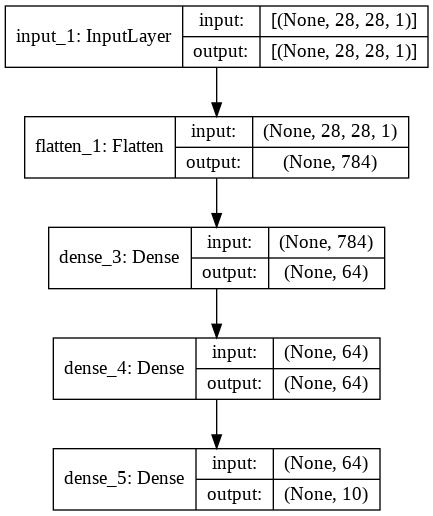

In [28]:
#make sure you have already graphviz, pydot, pydotplus libraries.
tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [29]:
next(iter(train_ds))[1]

<tf.Tensor: shape=(32,), dtype=uint8, numpy=
array([4, 1, 8, 0, 5, 3, 3, 6, 9, 2, 3, 1, 6, 4, 8, 9, 2, 4, 9, 0, 9, 9,
       5, 4, 0, 0, 6, 0, 5, 0, 3, 9], dtype=uint8)>

In [30]:
# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# Trains for 5 epochs.
import math
steps_per_epoch=math.ceil(60000/32)
model.fit(train_ds, epochs=5, steps_per_epoch=steps_per_epoch)
# Don't forget to specify `steps_per_epoch` when calling `fit` on a dataset.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4720 - sparse_categorical_accuracy: 0.8649
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - sparse_categorical_accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9824


In [31]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - sparse_categorical_accuracy: 0.9737


[0.08926594257354736, 0.9736999869346619]